In [1]:
import pandas as pd

In [2]:
df_1 = pd.read_csv("dataset/preprocessed/data_grade1.csv")
df_2 = pd.read_csv("dataset/preprocessed/data_grade2.csv")
df_3 = pd.read_csv("dataset/preprocessed/data_grade3.csv")
df_columns_map = pd.read_csv("dataset/columns_map.csv")

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, confusion_matrix

def calc_metrics(y_test, y_pred, y_pred_proba):
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

  accuracy = accuracy_score(y_test, y_pred)
  sensitivity = tp / (tp + fn)  
  specificity = tn / (tn + fp)  
  kappa = cohen_kappa_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred_proba)

  return accuracy, sensitivity, specificity, kappa, auc

In [4]:
def print_metrics(accuracy, sensitivity, specificity, kappa, auc):
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Sensitvity: {sensitivity:.4f}")
  print(f"Specificity: {specificity:.4f}")
  print(f"Kappa: {kappa:.4f}")
  print(f"AUC: {auc:.4f} \n")

In [5]:
from sklearn.model_selection import train_test_split

def split_train_test(df, cols_X, cols_y):
  result = []

  df_X = df.loc[:, cols_X]

  for col_y in cols_y:
    df_y = df[col_y]
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    result.append({
      "col_y": col_y,
      "X_train": X_train,
      "X_test": X_test,
      "y_train": y_train,
      "y_test": y_test
    })
    
  return result

In [6]:
def predict(model, data_info):
  model.fit(X=data_info["X_train"], y=data_info["y_train"])

  y_pred = model.predict(data_info["X_test"])
  y_pred_proba = model.predict_proba(data_info["X_test"])[:, 1]

  return y_pred, y_pred_proba

In [7]:
cols_Xs = []

for grade in ["y4m", "y5m", "y6m"]:
  cols_X_grade = df_columns_map.loc[:, [grade, "converted", "var_type"]]
  cols_X_grade = cols_X_grade[cols_X_grade["var_type"] == "X"].dropna(subset=[grade])["converted"].values
  cols_Xs.append(cols_X_grade)

cols_y = df_columns_map.loc[:, ["converted", "var_type"]]
cols_y = cols_y[cols_y["var_type"] == "Y"]["converted"].values

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
result = []

for i, df in enumerate([df_1, df_2, df_3]):
  current_metrics_by_subject = {}
  for data_info in split_train_test(df, cols_Xs[i], cols_y):
    subject = data_info["col_y"].split("_")[0]

    y_pred, y_pred_proba = predict(model, data_info)
    accuracy, sensitivity, specificity, kappa, auc = calc_metrics(data_info["y_test"], y_pred, y_pred_proba)
    print_metrics(accuracy, sensitivity, specificity, kappa, auc)

    current_metrics_by_subject[subject] = {
      "Accuracy": accuracy,
      "Sensitivity": sensitivity,
      "Specificity": specificity,
      "Kappa": kappa,
      "AUC": auc,
    }
  
  result.append(current_metrics_by_subject)

Accuracy: 0.5297
Sensitvity: 0.5728
Specificity: 0.4770
Kappa: 0.0498
AUC: 0.5249 

Accuracy: 0.6744
Sensitvity: 0.6907
Specificity: 0.6580
Kappa: 0.3488
AUC: 0.6744 

Accuracy: 0.7132
Sensitvity: 0.7647
Specificity: 0.6446
Kappa: 0.4114
AUC: 0.7046 

Accuracy: 0.6128
Sensitvity: 0.6584
Specificity: 0.5561
Kappa: 0.2150
AUC: 0.6073 

Accuracy: 0.7449
Sensitvity: 0.7712
Specificity: 0.7143
Kappa: 0.4861
AUC: 0.7427 

Accuracy: 0.7380
Sensitvity: 0.7202
Specificity: 0.7557
Kappa: 0.4759
AUC: 0.7379 

Accuracy: 0.6271
Sensitvity: 0.6509
Specificity: 0.6029
Kappa: 0.2539
AUC: 0.6269 

Accuracy: 0.7363
Sensitvity: 0.7269
Specificity: 0.7463
Kappa: 0.4728
AUC: 0.7366 

Accuracy: 0.7458
Sensitvity: 0.7136
Specificity: 0.7748
Kappa: 0.4892
AUC: 0.7442 



In [9]:
import numpy as np
import matplotlib.pyplot as plt

def show_chart(result, metrics, subjects, title_prefix="Grade "):
    # 그래프 생성
    for idx, dataset in enumerate(result):
        plt.figure(figsize=(10, 6))
        bar_width = 0.2
        x = np.arange(len(metrics))
        
        for i, subject in enumerate(subjects):
            values = [dataset[subject][metric] for metric in metrics]
            plt.bar(x + i * bar_width, values, width=bar_width, label=subject)
        
        plt.xlabel('Metrics', fontsize=12)
        plt.ylabel('Values', fontsize=12)
        plt.title(f'{title_prefix}{idx + 1} Performance Metrics', fontsize=14)
        plt.xticks(x + bar_width, metrics, fontsize=10)
        plt.ylim(0, 1)  # 모든 지표의 값이 0~1 사이
        plt.legend(title="Subjects")
        plt.tight_layout()
        plt.grid(True, axis="y")
        plt.show()

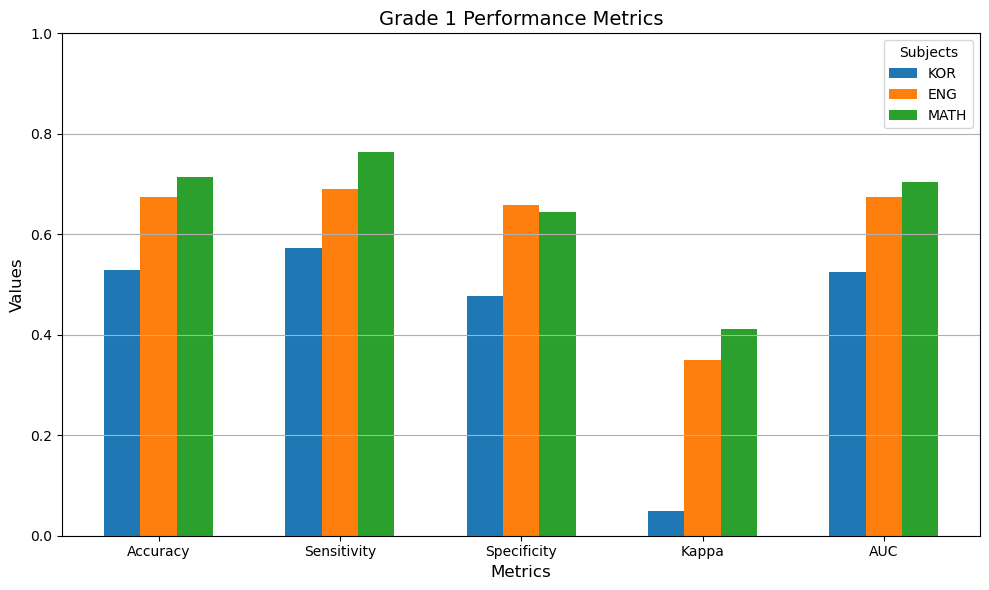

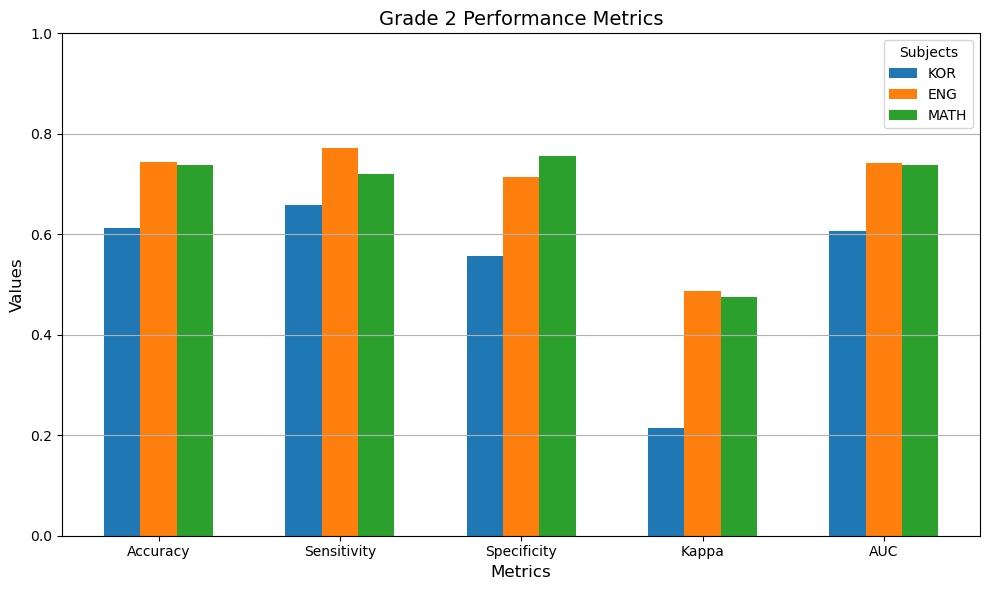

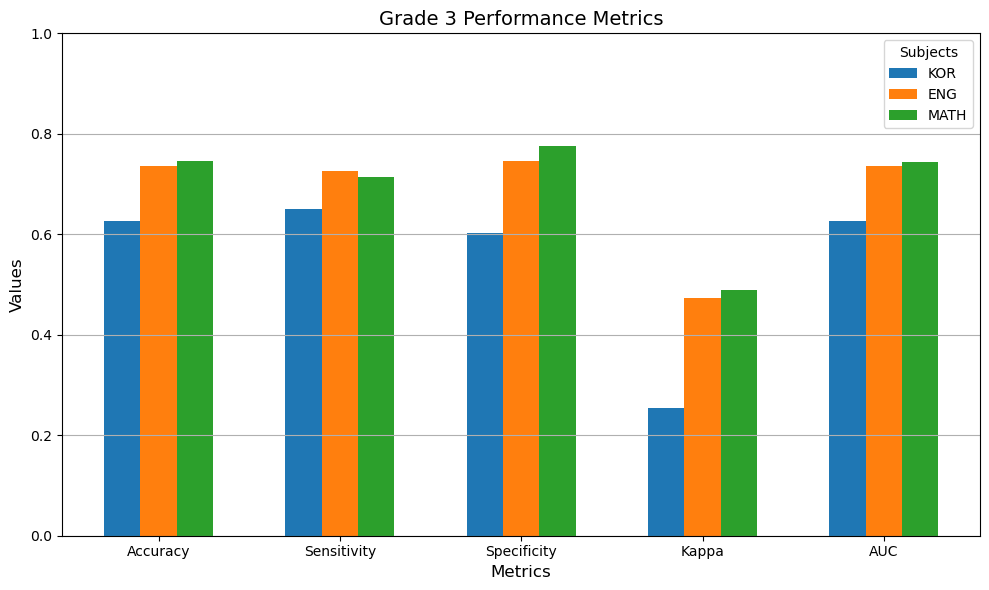

In [10]:
metrics = ["Accuracy", "Sensitivity", "Specificity", "Kappa", "AUC"]
subjects = ["KOR", "ENG", "MATH"]

show_chart(result, metrics, subjects)

Accuracy: 0.6048
Sensitvity: 0.6711
Specificity: 0.5294
Kappa: 0.2017
AUC: 0.6003 

Accuracy: 0.6394
Sensitvity: 0.6680
Specificity: 0.6118
Kappa: 0.2794
AUC: 0.6399 

Accuracy: 0.6432
Sensitvity: 0.6631
Specificity: 0.6270
Kappa: 0.2869
AUC: 0.6451 



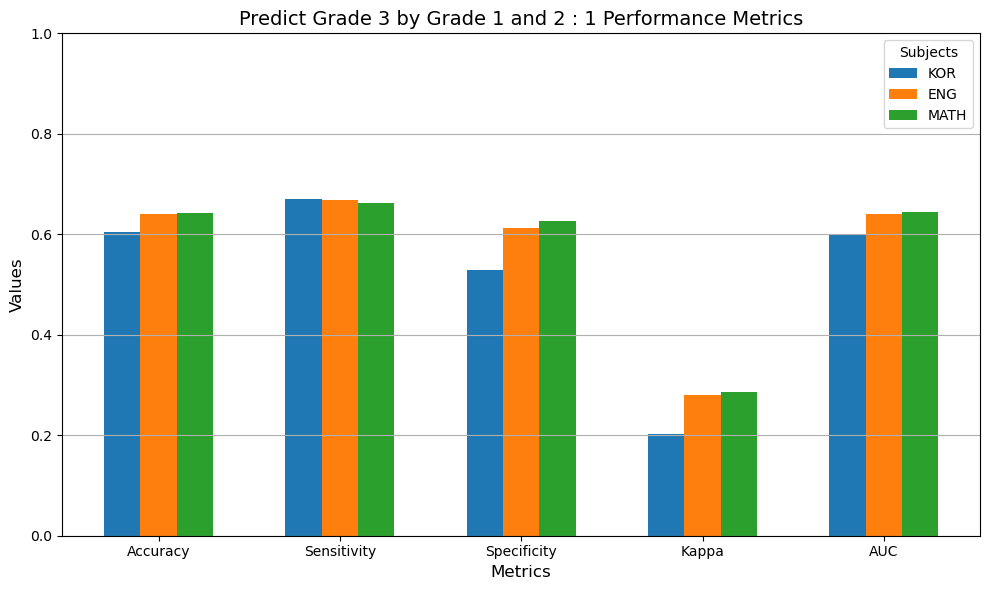

In [11]:
# 교수님 피드백: 1, 2학년 데이터로 3학년 점수 예측
df_1_2 = pd.concat([df_1, df_2]).dropna(axis=1)

metrics_by_subject = {}

for data_info in [{
  "col_y": col_y,
  "X_train": df_1_2.loc[:, cols_Xs[0]],
  "X_test": df_3.loc[:, cols_Xs[0]],
  "y_train": df_1_2[col_y],
  "y_test": df_3[col_y],
} for col_y in cols_y]:
  subject = data_info["col_y"].split("_")[0]

  y_pred, y_pred_proba = predict(model, data_info)
  accuracy, sensitivity, specificity, kappa, auc = calc_metrics(data_info["y_test"], y_pred, y_pred_proba)
  print_metrics(accuracy, sensitivity, specificity, kappa, auc)
  
  metrics_by_subject[subject] = {
    "Accuracy": accuracy,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "Kappa": kappa,
    "AUC": auc,
  }

show_chart([metrics_by_subject], metrics, subjects, "Predict Grade 3 by Grade 1 and 2 : ")